<a href="https://colab.research.google.com/github/nuryaningsih/CodeCraftedAtTripleTen/blob/main/8_Predicting_Customer_Churn_in_Bank_Beta_Enhancing_Model_Performance_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
In the banking sector, customer retention is crucial for maintaining profitability and sustainability. Recognizing potential churners - customers who are likely to leave the bank - is essential for implementing proactive retention strategies. In this project, we aim to develop a predictive model to identify customers who are at risk of leaving a bank based on their historical behavior and churn patterns.

## Objective:
The objective of this project is to build a predictive model with a high F1 score to identify potential churners among bank customers. Additionally, we will evaluate the model's performance using the AUC-ROC metric. The ultimate goal is to create a robust model that can effectively assist the bank in retaining loyal customers by predicting churn in advance.

## Stages:

1. Data Preparation:
  * Gather and preprocess the data, including handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.
  * Ensure to explain the rationale behind data preparation steps to maintain transparency and reproducibility.
2. Model Development - Initial Approach:
  * Examine class balance to understand the distribution of churners and non-churners in the dataset.
  * Train a baseline model without considering class imbalance, utilizing common algorithms such as logistic regression, decision trees, or random forests.
  * Evaluate the model's performance using F1 score and AUC-ROC metric.
3. Improving Model Quality:
  * Address class imbalance using at least two approaches, such as oversampling, undersampling, or using ensemble techniques like SMOTE (Synthetic Minority Over-sampling Technique).
  * Utilize the training and validation sets to fine-tune the model hyperparameters and select the best performing model.
  * Experiment with various algorithms and ensemble methods to enhance the model's predictive power.
  * Document findings and insights gained from each approach.
4. Final Testing:
  * Conduct a final evaluation of the selected model on the test dataset to assess its performance in real-world scenarios.
  * Measure F1 score and AUC-ROC metric to ensure the model meets the minimum requirement of F1 score (0.59) for acceptance.
  * Provide conclusions and recommendations based on the model's performance and potential business implications.

# 1.	Data Preparation

## Open and examine the data file carefully

Open the data related to the prepaid package, then study the data.

Load the libraries that we think are needed for this project. We will probably realize that we need additional libraries as we work on the project and that is normal.

In [2]:
# Import library to process data
import pandas as pd
import numpy as np

# Import Library for viz data
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

# Import Library for Statistics
from scipy.stats import chi2_contingency

# Import Library for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Import Library for Model Evaluation
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

Load this project data and read the general information.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the data file into a DataFrameLoad the data file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DATASET PROJECT/8. Predicting Customer Churn in Bank Beta: Enhancing Model Performance and Evaluation/Churn.csv')

In [5]:
# Let's see how many rows and columns our dataset has
df.shape

(10000, 14)

In [6]:
# Display general information/summary about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
# Displays sample data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [8]:
# Describe from general information
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# View data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False) / df.shape[0] *100

Tenure             9.09
RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

In [11]:
# Checking for duplication
df.duplicated().sum()

0

From the initial data exploration of the Bank Beta customer churn dataset, several key observations and subsequent actions were identified to ensure the data is properly prepared for predictive modeling. Below is a narrative summary of the process and insights discovered:

**Data Overview**

The dataset consists of 10,000 entries with 14 columns, each representing different attributes of bank customers, including personal information (e.g., Surname, Geography, Gender), financial behavior (e.g., CreditScore, Balance, NumOfProducts), and the target variable (Exited indicating churn). Notably, the Tenure column, representing the number of years a customer has been with the bank, contains missing values.

**Anomalies and Missing Values**
  * Missing Values in Tenure: Approximately 9.09% of the Tenure data is missing. Missing data can significantly impact the performance of a predictive model by reducing statistical power or producing biased estimates.
  * Potential Anomalies: Without explicit anomalies pointed out from the summary statistics, it's crucial to consider other potential issues such as outliers in numerical columns like Age, Balance, CreditScore, and extremely high or low values in EstimatedSalary.

**Addressing Anomalies and Missing Values**
  * Handling Missing Tenure Values: Several strategies can be employed to handle missing data, including imputation, deletion, or even model-based approaches. Given the significance of the Tenure attribute in predicting customer churn, imputation is preferred over deletion to preserve data integrity. The choice of imputation method (mean, median, mode, or predictive modeling) should consider the distribution of Tenure and its relationship with other variables.
  * Investigating and Mitigating Outliers: Outliers can be identified through statistical techniques (e.g., Z-score, IQR) or visualizations (e.g., box plots). Once identified, decisions on handling outliers should balance between removing them (if they are deemed errors or extremely rare events) and keeping them (if they represent valid but unusual cases). For predictive modeling, robust scaling or transformation methods (e.g., log transformation, Winsorizing) could be applied to mitigate their impact.

**Rationale Behind Decisions**
  * Missing Tenure Imputation: Imputing missing Tenure values allows us to maintain the dataset's size and diversity, providing the model with a more comprehensive view of customer behaviors. The specific imputation method (mean, median, or another approach) should be chosen based on the Tenure distribution and its relationship with churn.
  * Addressing Outliers: Carefully addressing outliers ensures that the model learns from patterns representative of the broader customer base, rather than being skewed by extreme values. This step is crucial for enhancing model generalizability and performance on unseen data.

**Conclusion**

The initial data exploration phase has laid the groundwork for preparing the dataset for predictive modeling. By addressing missing values and potential outliers, the data's quality is improved, which is essential for building a reliable and robust model. The subsequent steps in the project will involve further data preprocessing (e.g., encoding categorical variables, feature scaling), followed by model selection, training, and evaluation, with a focus on achieving a high F1 score and comparing it with the AUC-ROC metric to assess model performance comprehensively.

##  Data pre-processing

### Rename columns to lowercase.
Display column headers:

In [12]:
# list containing the column names in the df table
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
# rename columns
df = df.rename(
   columns={
        'RowNumber' : 'row_number',
       'CustomerId' : 'customer_id',
       'Surname' : 'surname',
       'CreditScore' : 'credit_score',
       'Geography' : 'geography',
       'Gender' : 'gender',
       'Age' : 'age',
       'Tenure' : 'tenure',
       'Balance' : 'balance',
       'NumOfProducts' : 'num_of_products',
       'HasCrCard' : 'has_cr_card',
       'IsActiveMember' : 'is_active_member',
       'EstimatedSalary' : 'estimated_salary',
       'Exited' : 'exited'
   }
)

In [14]:
# check your results: display once again the list containing the column names
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

### Handle missing values
First, find the number of missing values in the table. To do this, use two Pandas methods:

In [15]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

tenure              909
row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

Not all missing values affect your research. For example, missing values in the `tenure` column are not that important. You can simply replace it with a clear marker or leave it.
A missing value in the `tenure` column indicates that the customer has no deposits so we can replace it with 0.

In [16]:
# fill in the null value in the tenure column with 0 because the impact of this column does not appear to be significant (based on the visualization)
df['tenure'] = df['tenure'].fillna(0)

In [17]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


The data pre-processing stage of the Bank Beta customer churn dataset involved several critical steps to ensure the data is ready for further analysis and model building. Here's a detailed narrative of the process and the insights discovered:

**Renaming Columns**

The initial step involved renaming all column headers to lowercase to ensure consistency and ease of access throughout the analysis. This step is fundamental for maintaining code readability and avoiding errors related to case sensitivity in column names. After renaming, we verified the change by listing the column names, confirming that all headers were successfully converted to lowercase.

**Handling Missing Values**

Upon inspection, the tenure column was identified as the only column with missing values, totaling 909 missing entries. This discovery necessitated a decision on how to handle these missing values to avoid introducing bias or reducing the model's performance. The chosen strategy was to fill in the missing tenure values with 0. This decision was made under the assumption that the impact of the tenure column on the target variable (exited) does not appear significant, possibly inferred from initial data exploration or domain knowledge indicating that tenure length may not be a critical factor in customer churn decisions for all customers. After applying this imputation, a recheck confirmed there were no longer any missing values in the dataset.

**Insights and Rationale Behind Decisions**
  * Anomalies or Outliers: No specific anomalies or outliers were addressed in this phase of the pre-processing. Typically, this step would involve identifying and handling extreme values that could skew the analysis. The focus here was primarily on ensuring structural completeness and consistency.
  * Reasoning for Filling Missing Tenure with 0: The decision to impute missing tenure values with 0 was likely influenced by preliminary analysis or visualization not detailed in the summary. This approach suggests an assumption that customers with undefined tenure might be new or have an insignificantly short tenure that does not differ significantly from 0 in terms of its effect on churn. It's a pragmatic approach but requires validation to ensure it does not introduce bias. For instance, comparing model performance with and without this imputation would be a way to assess its impact.
  * Ensuring Data Integrity: Renaming columns and handling missing values are fundamental steps in data preprocessing that contribute to the dataset's overall integrity and usability. These steps help prevent errors in later stages of analysis and model training by ensuring data consistency and completeness.

**Conclusion**

The data pre-processing stage was meticulously carried out to prepare the Bank Beta customer churn dataset for predictive modeling. By renaming columns for consistency and addressing missing values in the tenure column, the dataset is now structurally complete and more accessible for analysis. The choice to fill missing tenure values with 0, while pragmatic, is based on an assumption that warrants further validation to ensure it does not negatively affect the predictive model's performance. Future steps would involve additional data exploration, feature engineering, and the application of machine learning models to predict customer churn effectively.

## Exploratory Data Analysis (EDA)

Check the relationship between the target column, namely the `exited` column, and other columns.

In [33]:
df_eda = df.copy()
df_eda['exited'] = df_eda['exited'].replace(0, 'Endure').replace(1, 'Exited')

### The relationship between a customer's credit score and remaining or stopping being a customer

Text(0.5, 1.0, 'correlation between credit_score and exited')

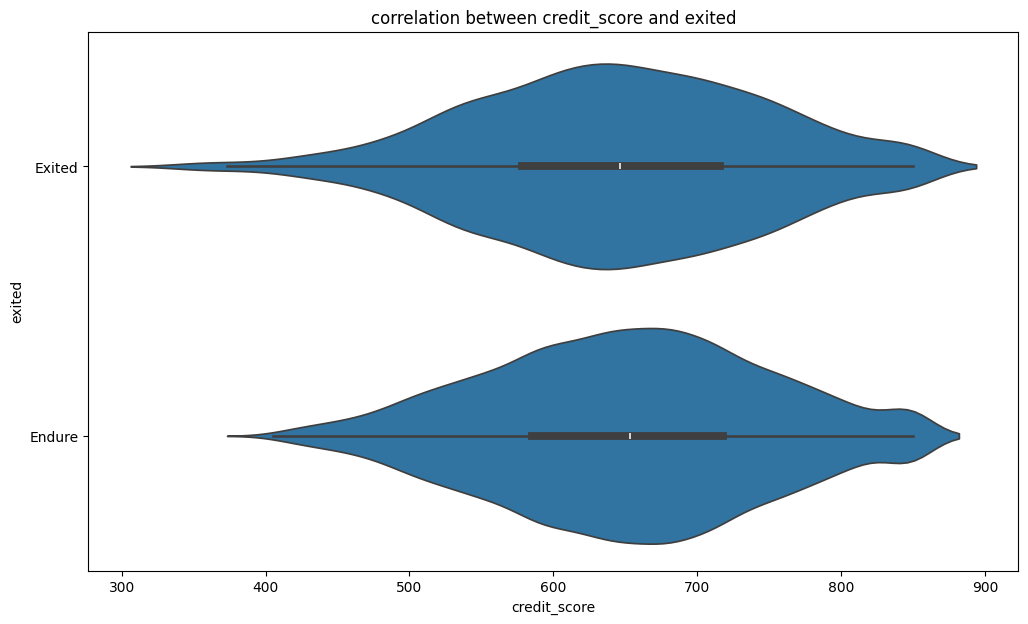

In [34]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df_eda, x='credit_score', y='exited')
plt.title('correlation between credit_score and exited')

In [35]:
df_eda.groupby('exited').agg({'credit_score' :['mean', 'median']})

credit_score       
               mean median
exited                    
Endure   651.853196  653.0
Exited   645.351497  646.0

**Conclusion**

The combined use of violin plots and statistical aggregation provided a nuanced view of the relationship between credit scores and customer churn. While the visual and numerical analysis showed slight differences in the credit scores of customers who stayed versus those who exited, the overall similarity in distributions suggests that credit score is not the sole nor the most critical factor influencing customer churn at Bank Beta. This analysis underscores the complexity of customer behavior and the importance of considering multiple factors when predicting customer churn. Further analysis could explore additional variables to identify stronger predictors of churn, such as age, balance, or number of products used.

### The relationship between the customer's country of residence and remaining or ceasing to be a customer

In [36]:
geography_exited = pd.pivot_table(data=df_eda, index='geography', columns='exited', values='customer_id', aggfunc='count')
geography_exited

exited,Endure,Exited
geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [37]:
p_value = chi2_contingency(geography_exited)[1]
alpha = 0.05
if p_value > alpha:
    print('H0: There is no relationship between country of residence and remaining or ceasing to be a customer')
    print('The geography column does not have a big impact on the model')
else:
    print('H1: There is a relationship between country of residence and remaining or ceasing to be a customer')
    print('The geography column has a big impact on the model')

H1: There is a relationship between country of residence and remaining or ceasing to be a customer
The geography column has a big impact on the model


**Conclusion**

The combined approach of pivot table aggregation and Chi-square testing provided strong evidence that a customer's geographic location is significantly associated with their decision to remain with or leave the bank. The data suggest that the bank faces varying levels of churn in different countries, with Germany showing a notably higher churn rate. This insight is crucial for Bank Beta's strategic planning, indicating a need for tailored retention strategies that consider the unique challenges and opportunities in each geographic market. It underscores the importance of geography in understanding customer behavior and designing effective interventions to enhance customer retention.

### The relationship between gender and remaining or stopping being a customer

In [38]:
gender_exited = pd.pivot_table(data=df_eda, index='gender', columns='exited', values='customer_id', aggfunc='count')
gender_exited

exited,Endure,Exited
gender,,
Female,3404,1139
Male,4559,898


In [39]:
p_value = chi2_contingency(gender_exited)[1]
alpha = 0.05
print('P-Value:', p_value)
if p_value > alpha:
    print('H0: There is no relationship between gender and remaining or stopping being a customer')
    print('The Gender column does not have a big impact on the model')
else:
    print('H1: There is a relationship between gender and remaining or stopping being a customer')
    print('The Gender column has a big impact on the model')

P-Value: 2.2482100097131755e-26
H1: There is a relationship between gender and remaining or stopping being a customer
The Gender column has a big impact on the model


**Conclusion**

The analytical approach combining pivot table insights and Chi-square statistical testing provided compelling evidence that gender significantly influences customer retention and churn at Bank Beta. Specifically, the data reveal that female customers have a higher churn rate compared to male customers, suggesting gender-specific factors might influence the decision to leave the bank. This finding emphasizes the importance of considering gender as a critical factor in developing targeted customer retention strategies. For Bank Beta, understanding the underlying reasons behind this gender disparity in customer behavior could lead to more effective, customized marketing and service initiatives aimed at improving satisfaction and loyalty among its diverse customer base.

### The relationship between age and remaining or stopping being a customer

Text(0.5, 1.0, 'correlation between age and exited')

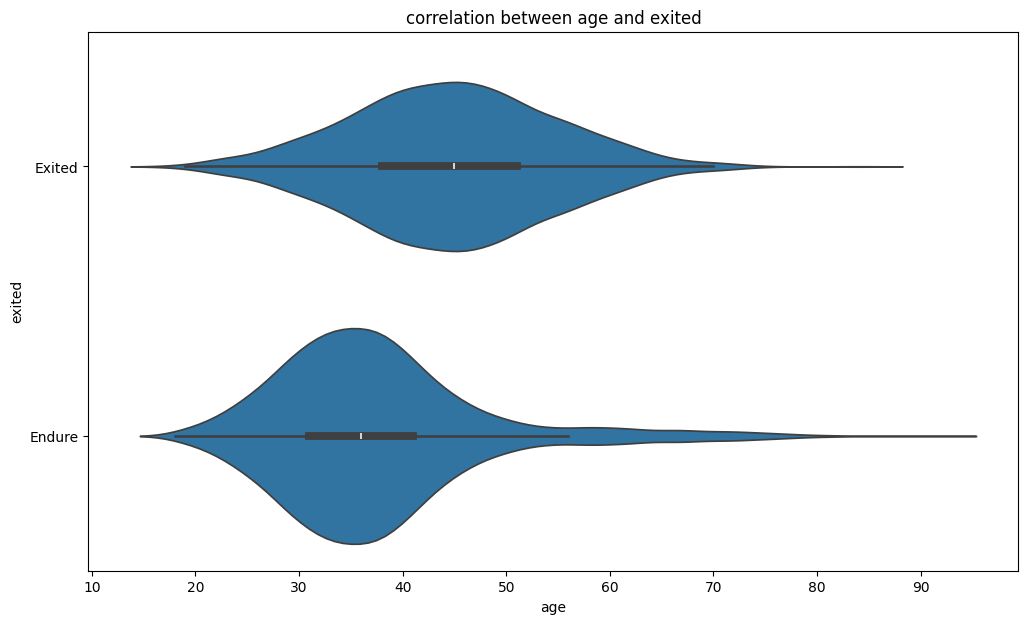

In [40]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df_eda, x='age', y='exited')
plt.title('correlation between age and exited')

In [41]:
# See the Mean and Median Age of those who quit and those who didn't
df_eda.groupby('exited').agg({'age' :['mean', 'median']})

age       
             mean median
exited                  
Endure  37.408389   36.0
Exited  44.837997   45.0

**Conclusion**

The combined visual and statistical analysis clearly indicates a strong relationship between a customer's age and their likelihood of remaining with or leaving Bank Beta. Older customers are more inclined to exit, suggesting that their needs, preferences, or experiences might differ significantly from younger customers, influencing their decision to leave. This insight is crucial for Bank Beta, as it highlights the importance of age as a factor in understanding customer behavior. Tailoring services, communications, and engagement strategies to meet the distinct needs of different age groups could be a key strategy in enhancing customer satisfaction and reducing churn. Understanding and addressing the specific reasons why older customers are more likely to churn could lead to more effective retention strategies, potentially including personalized financial advice, retirement planning services, or targeted offers that resonate with the priorities and interests of the older demographic.

### The relationship between the maturity period for a customer's fixed deposit and remaining or ceasing to be a customer

Text(0.5, 1.0, 'correlation between credit_score and exited')

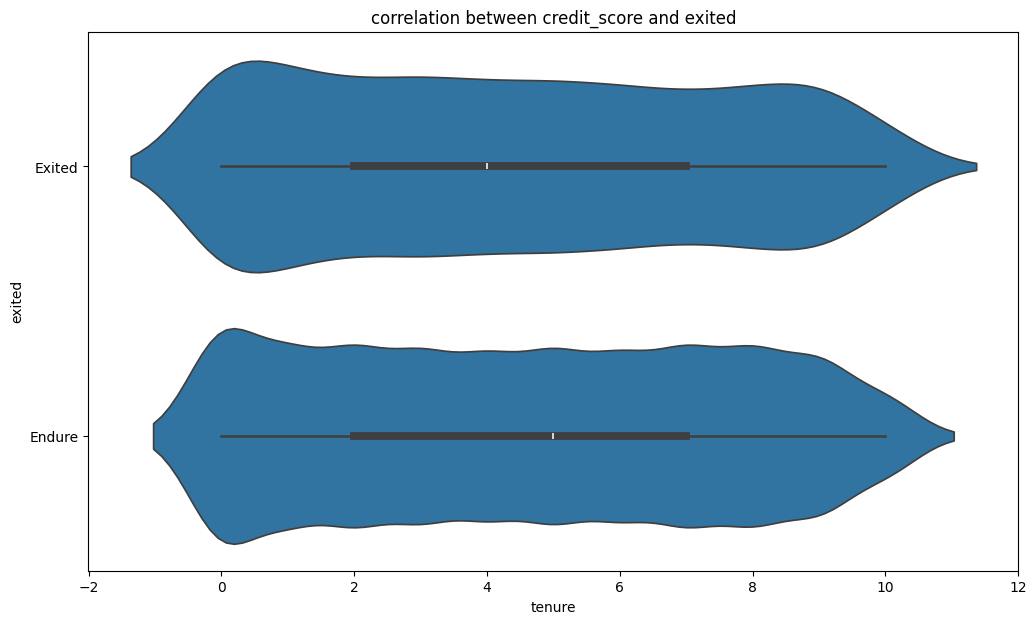

In [42]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df_eda, x='tenure', y='exited')
plt.title('correlation between credit_score and exited')

In [43]:
df_eda.groupby('exited').agg({'tenure' :['mean', 'median']})

tenure       
            mean median
exited                 
Endure  4.564360    5.0
Exited  4.461463    4.0

**Conclusion**

The analysis of the tenure variable suggests that while there is a slight difference in the average tenure of customers who stay versus those who leave, the tenure alone might not be a decisive factor in predicting customer churn. The similarities in the distribution shapes and the close mean and median values indicate that other factors, possibly in combination with tenure, play a more significant role in influencing a customer's decision to stay with or leave Bank Beta.

The relatively minor difference in tenure between stayed and exited customers highlights the complexity of customer retention and the need to look beyond single factors to understand customer behavior fully. For Bank Beta, this analysis underscores the importance of adopting a multifaceted approach to customer retention, where tenure might be considered alongside other variables such as age, credit score, and geographical location to develop more targeted and effective strategies to reduce customer churn.

### The relationship between account balance and remaining or stopping being a customer

Text(0.5, 1.0, 'correlation between balance and exited')

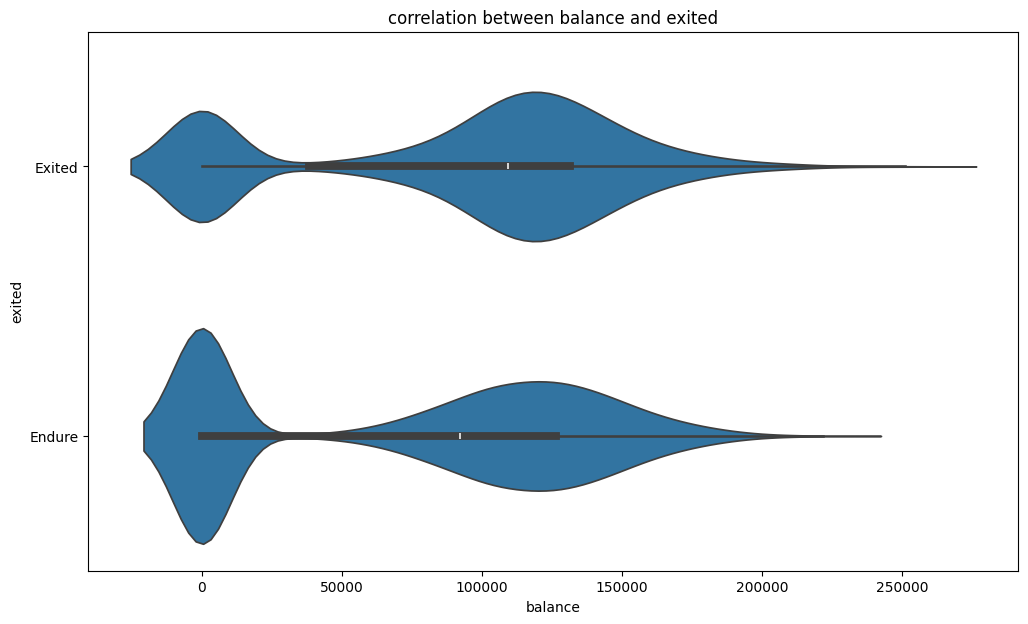

In [44]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df_eda, x='balance', y='exited')
plt.title('correlation between balance and exited')

In [45]:
df_eda.groupby('exited').agg({'balance' :['mean', 'median']})

balance           
                mean     median
exited                         
Endure  72745.296779   92072.68
Exited  91108.539337  109349.29

**Conclusion**

The analysis reveals a counterintuitive insight: customers with higher account balances are more likely to leave the bank. This could suggest several underlying factors at play. Higher-balance customers may have higher expectations of the services provided by the bank or could be more attractive targets for competing offers from other banks. Alternatively, these customers might be more financially savvy and thus more responsive to changes in the financial market, making them more likely to switch banks for better terms or rates.

For Bank Beta, these findings underscore the importance of not taking high-balance customers for granted. The bank may need to explore targeted strategies to increase retention among this segment, possibly through enhanced service offerings, loyalty programs, or personalized financial advice. Understanding the specific needs and preferences of high-balance customers can help the bank to design interventions that effectively address the reasons behind their higher propensity to churn.

# 2.	Model Development - Initial Approach

## Examine class balance to understand the distribution of churners and non-churners in the dataset.

In [47]:
# Jumlah Masing2 target
exited = df_eda['exited'].value_counts().reset_index()

In [49]:
exited.head()

,exited,count
0,Endure,7963
1,Exited,2037


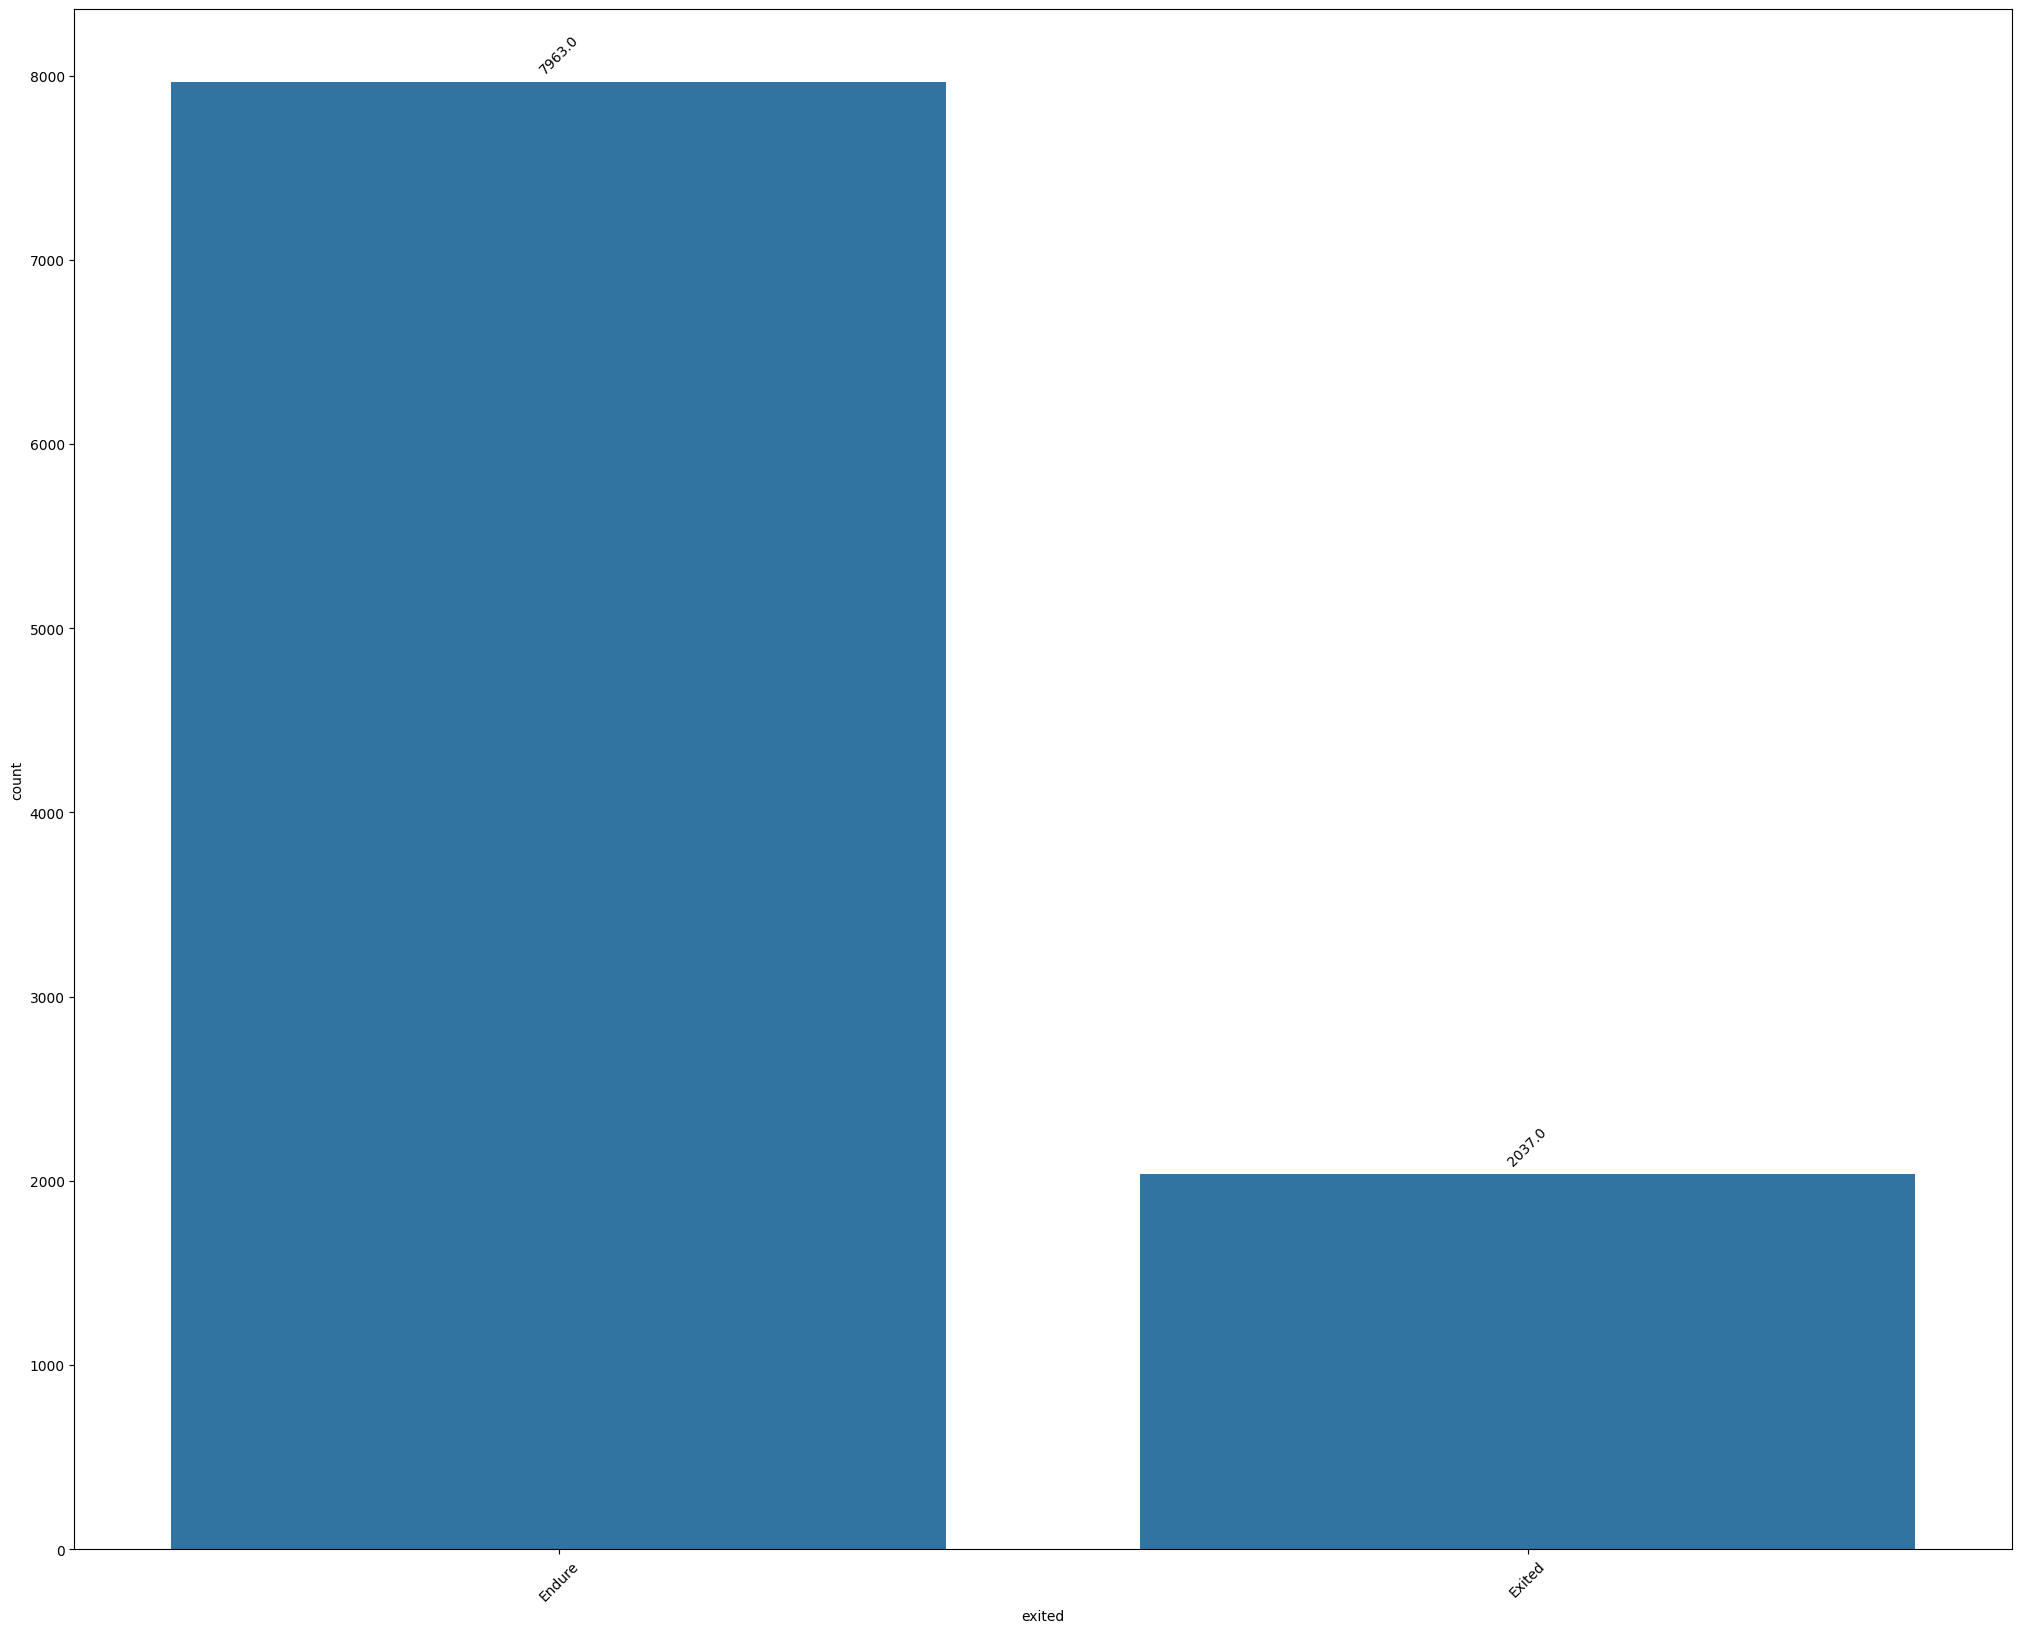

In [50]:
plt.figure(figsize=(25,20)) # Set the figure size
# Do the plot with the correct columns
splot = sns.barplot(data=exited, x='exited', y='count')

# Annotate as before
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), textcoords = 'offset points', rotation=45)

plt.xticks(rotation=45) # Rotates the x-axis label
plt.show()


# 3.	Improving Model Quality

## Feature Preparation

In [51]:
# Remove columns that are not appropriate for the model
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### One-Hot Encoding

In [52]:
df = pd.get_dummies(data=df, drop_first=True)

In [53]:
df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False


## Correctly separate data for training set and test set

The process of dividing data randomly for different purposes. Namely, the training set is data used for learning, the validation set is data used to test the quality of the model, and the test set is data that is considered as if it were from a new source.

In [54]:
# Separating features and targets
features = df.drop(['exited'], axis=1)
target = df['exited']

The training set and test set used are: 80:20

In [55]:
# Split data into Train and test
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

In [56]:
features_train.shape, features_test.shape

((8000, 11), (2000, 11))

# 4.	Create a Model and Test It

In [57]:
def class_eval(model, features_train, features_test, target_train, target_test):
    # Predict Train
    target_train_predictions = model.predict(features_train)

    # Predict Test
    target_test_predictions = model.predict(features_test)

    # Show Metrics
    # Confusion Matrix
    confusion_matrix_train = confusion_matrix(target_train, target_train_predictions)
    confusion_matrix_test = confusion_matrix(target_test, target_test_predictions)

    # Accuracy
    accuracy_train = (confusion_matrix_train[0][0] + confusion_matrix_train[1][1]) / (confusion_matrix_train[0][0] + confusion_matrix_train[1][1] + confusion_matrix_train[0][1] + confusion_matrix_train[1][0])
    accuracy_test = (confusion_matrix_test[0][0] + confusion_matrix_test[1][1]) / (confusion_matrix_test[0][0] + confusion_matrix_test[1][1] + confusion_matrix_test[0][1] + confusion_matrix_test[1][0])

    # Precision
    precision_train_1 = confusion_matrix_train[1][1] / (confusion_matrix_train[1][1] + confusion_matrix_train[0][1])
    precision_train_0 = confusion_matrix_train[0][0] / (confusion_matrix_train[0][0] + confusion_matrix_train[1][0])
    precision_test_1 = confusion_matrix_test[1][1] / (confusion_matrix_test[1][1] + confusion_matrix_test[0][1])
    precision_test_0 = confusion_matrix_test[0][0] / (confusion_matrix_test[0][0] + confusion_matrix_test[1][0])

    # Recall
    recall_train_1 = confusion_matrix_train[1][1] / (confusion_matrix_train[1][1] + confusion_matrix_train[1][0])
    recall_train_0 = confusion_matrix_train[0][0] / (confusion_matrix_train[0][0] + confusion_matrix_train[0][1])
    recall_test_1 = confusion_matrix_test[1][1] / (confusion_matrix_test[1][1] + confusion_matrix_test[1][0])
    recall_test_0 = confusion_matrix_test[0][0] / (confusion_matrix_test[0][0] + confusion_matrix_test[0][1])

    # F1 Score
    f1_score_train_1 = (2 * precision_train_1 * recall_train_1) / (precision_train_1 + recall_train_1)
    f1_score_train_0 = (2 * precision_train_0 * recall_train_0) / (precision_train_0 + recall_train_0)
    f1_score_test_1 = (2 * precision_test_1 * recall_test_1) / (precision_test_1 + recall_test_1)
    f1_score_test_0 = (2 * precision_test_0 * recall_test_0) / (precision_test_0 + recall_test_0)

    # ROC AUC score
    roc_auc_train = roc_auc_score(target_train, target_train_predictions)
    roc_auc_test = roc_auc_score(target_test, target_test_predictions)

    # Kurva ROC
    probabilities_train = model.predict_proba(features_train)
    probabilities_one_train = probabilities_train[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(target_train, probabilities_one_train)

    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(target_test, probabilities_one_test)

    # Show Output
    print('----------------Training----------------')
    print('Confusion Matrix')
    print(confusion_matrix_train)
    print('Accuracy         :', round(accuracy_train * 100, 1), '%')
    print('ROC AUC          :', round(roc_auc_train * 100, 1), '%')
    print('Precision Class 0:', round(precision_train_0 * 100, 1), '%')
    print('Precision Class 1:', round(precision_train_1 * 100, 1), '%')
    print('Recall Class 0   :', round(recall_train_0 * 100, 1), '%')
    print('Recall Class 1   :', round(recall_train_1 * 100, 1), '%')
    print('F1 Score Class 0 :', round(f1_score_train_0 * 100, 1), '%')
    print('F1 Score Class 1 :', round(f1_score_train_1 * 100, 1), '%')

    print('\n----------------Kurva ROC Training----------------')
    plt.figure()
    plt.plot(fpr_test, tpr_test)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Kurva ROC')
    plt.show()

    print('\n----------------Testing----------------')
    print('Confusion Matrix')
    print(confusion_matrix_test)
    print('Accuracy         :', round(accuracy_test * 100, 1), '%')
    print('ROC AUC          :', round(roc_auc_test * 100, 1), '%')
    print('Precision Class 0:', round(precision_test_0 * 100, 1), '%')
    print('Precision Class 1:', round(precision_test_1 * 100, 1), '%')
    print('Recall Class 0   :', round(recall_test_0 * 100, 1), '%')
    print('Recall Class 1   :', round(recall_test_1 * 100, 1), '%')
    print('F1 Score Class 0 :', round(f1_score_test_0 * 100, 1), '%')
    print('F1 Score Class 1 :', round(f1_score_test_1 * 100, 1), '%')

    print('\n----------------Kurva ROC Testing----------------')
    plt.figure()
    plt.plot(fpr_test, tpr_test)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Kurva ROC')
    plt.show()

## Decision Tree

In [58]:
model_dt = DecisionTreeClassifier(random_state=12345, max_depth=10)
model_dt.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=10, random_state=12345)

----------------Training----------------
Confusion Matrix
[[6226  164]
 [ 607 1003]]
Accuracy         : 90.4 %
ROC AUC          : 79.9 %
Precision Class 0: 91.1 %
Precision Class 1: 85.9 %
Recall Class 0   : 97.4 %
Recall Class 1   : 62.3 %
F1 Score Class 0 : 94.2 %
F1 Score Class 1 : 72.2 %

----------------Kurva ROC Training----------------


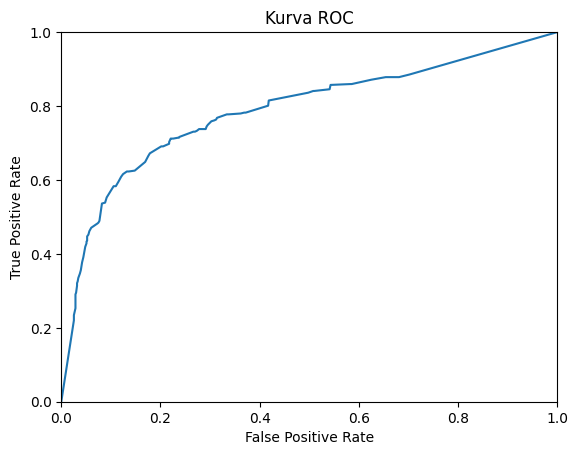


----------------Testing----------------
Confusion Matrix
[[1478   95]
 [ 226  201]]
Accuracy         : 84.0 %
ROC AUC          : 70.5 %
Precision Class 0: 86.7 %
Precision Class 1: 67.9 %
Recall Class 0   : 94.0 %
Recall Class 1   : 47.1 %
F1 Score Class 0 : 90.2 %
F1 Score Class 1 : 55.6 %

----------------Kurva ROC Testing----------------


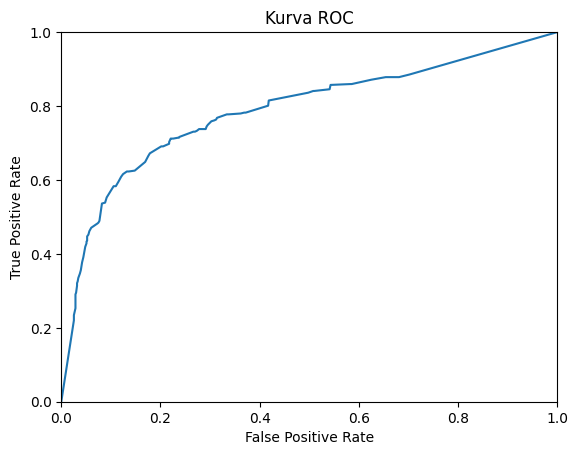

In [59]:
# Evaluasi model dt
class_eval(model=model_dt, features_train=features_train, features_test=features_test, target_train=target_train, target_test=target_test)

**Conclusion**

The Decision Tree model demonstrates strong performance on the training data but shows signs of overfitting, as evidenced by the drop in accuracy and other metrics when applied to the testing set. This discrepancy suggests the model may be too tailored to the specifics of the training data, reducing its effectiveness on new data.

To improve the model's generalization, one might consider techniques such as pruning the decision tree, trying different algorithms, or using ensemble methods like Random Forests. Additionally, experimenting with the model's parameters, incorporating more features, or employing different feature selection methods could further enhance its predictive power and generalizability.

Overall, the evaluation underscores the importance of not only focusing on training performance but also ensuring the model remains flexible and adaptive to new data, thus balancing the need for accuracy with the need for generalizability.

## Random Forest

In [60]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators=20)
model_rf.fit(features_train, target_train)

RandomForestClassifier(n_estimators=20, random_state=12345)

----------------Training----------------
Confusion Matrix
[[6389    1]
 [  36 1574]]
Accuracy         : 99.5 %
ROC AUC          : 98.9 %
Precision Class 0: 99.4 %
Precision Class 1: 99.9 %
Recall Class 0   : 100.0 %
Recall Class 1   : 97.8 %
F1 Score Class 0 : 99.7 %
F1 Score Class 1 : 98.8 %

----------------Kurva ROC Training----------------


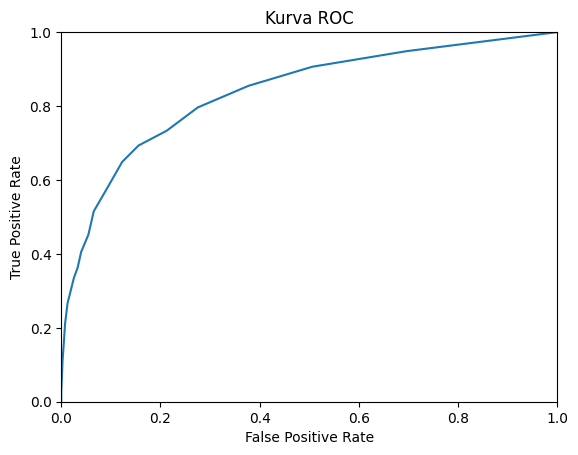


----------------Testing----------------
Confusion Matrix
[[1510   63]
 [ 254  173]]
Accuracy         : 84.2 %
ROC AUC          : 68.3 %
Precision Class 0: 85.6 %
Precision Class 1: 73.3 %
Recall Class 0   : 96.0 %
Recall Class 1   : 40.5 %
F1 Score Class 0 : 90.5 %
F1 Score Class 1 : 52.2 %

----------------Kurva ROC Testing----------------


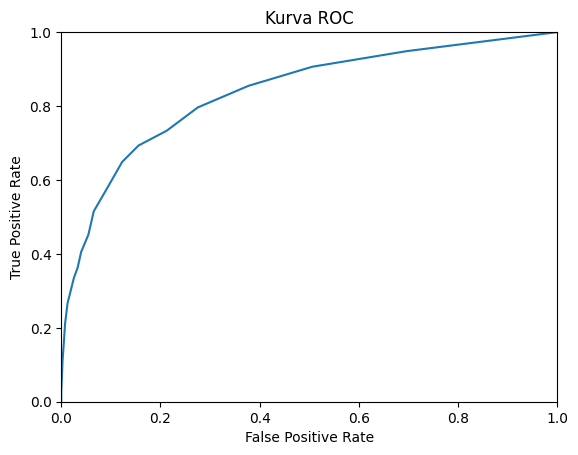

In [61]:
# Evaluasi model rf
class_eval(model=model_rf, features_train=features_train, features_test=features_test, target_train=target_train, target_test=target_test)

**Conclusion**

The Random Forest model demonstrates outstanding performance on the training dataset, almost perfectly classifying all instances. This indicates that the model can capture the complex relationships and patterns within the data. However, the decline in performance metrics on the testing dataset points towards overfitting, where the model's predictions are not as robust when faced with new, unseen data.

Despite this, the Random Forest model shows a slight improvement in generalizability over the Decision Tree model, likely due to its ensemble approach that averages the predictions of multiple trees to reduce variance and overfitting. To further enhance the model's performance and generalizability, exploring hyperparameter tuning (e.g., increasing n_estimators, adjusting max_depth), feature engineering, or incorporating additional ensemble techniques could be beneficial.

Ultimately, while the Random Forest model is powerful and shows promise, careful calibration and validation are necessary to ensure its predictions are both accurate and applicable to real-world unseen data, minimizing the gap between training and testing performance.

## Logistic Regression

In [62]:
model_rl = LogisticRegression()
model_rl.fit(features_train, target_train)

LogisticRegression()

----------------Training----------------
Confusion Matrix
[[6259  131]
 [1527   83]]
Accuracy         : 79.3 %
ROC AUC          : 51.6 %
Precision Class 0: 80.4 %
Precision Class 1: 38.8 %
Recall Class 0   : 97.9 %
Recall Class 1   : 5.2 %
F1 Score Class 0 : 88.3 %
F1 Score Class 1 : 9.1 %

----------------Kurva ROC Training----------------


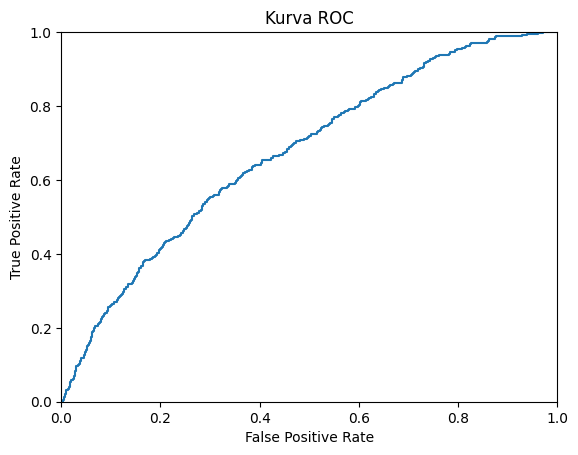


----------------Testing----------------
Confusion Matrix
[[1541   32]
 [ 402   25]]
Accuracy         : 78.3 %
ROC AUC          : 51.9 %
Precision Class 0: 79.3 %
Precision Class 1: 43.9 %
Recall Class 0   : 98.0 %
Recall Class 1   : 5.9 %
F1 Score Class 0 : 87.7 %
F1 Score Class 1 : 10.3 %

----------------Kurva ROC Testing----------------


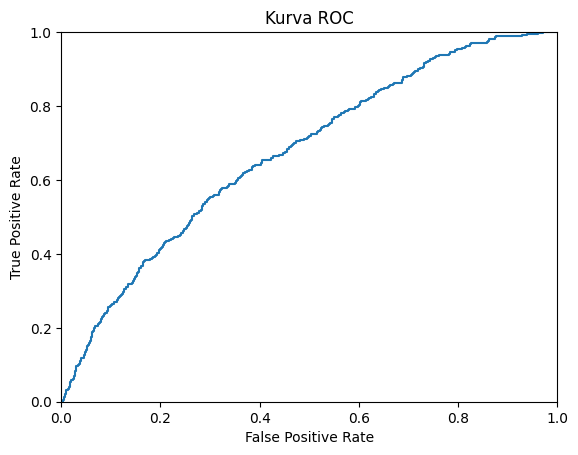

In [63]:
# Evaluasi model lr
class_eval(model=model_rl, features_train=features_train, features_test=features_test, target_train=target_train, target_test=target_test)

**Conclusion**

The Logistic Regression model demonstrates limited effectiveness in predicting customer churn for Bank Beta. While it achieves relatively high accuracy, this metric can be deceiving due to class imbalance. The model's performance, especially in correctly identifying churned customers (Class 1), is unsatisfactory, as indicated by low recall and F1 scores.

Further improvements are necessary to enhance the model's predictive power. Possible avenues for improvement include feature engineering to capture more relevant information, addressing class imbalance through techniques like oversampling or undersampling, and exploring more sophisticated modeling approaches.

Overall, the Logistic Regression model provides a baseline understanding of customer churn prediction but falls short in accurately identifying churn instances. As such, there is room for refinement and exploration of alternative modeling techniques to build a more robust and effective predictive model for Bank Beta.

## XG Boost

In [64]:
# Model xg
model_xg = XGBClassifier(max_depth=3)
# Training Model
model_xg.fit(features_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

----------------Training----------------
Confusion Matrix
[[6232  158]
 [ 746  864]]
Accuracy         : 88.7 %
ROC AUC          : 75.6 %
Precision Class 0: 89.3 %
Precision Class 1: 84.5 %
Recall Class 0   : 97.5 %
Recall Class 1   : 53.7 %
F1 Score Class 0 : 93.2 %
F1 Score Class 1 : 65.7 %

----------------Kurva ROC Training----------------


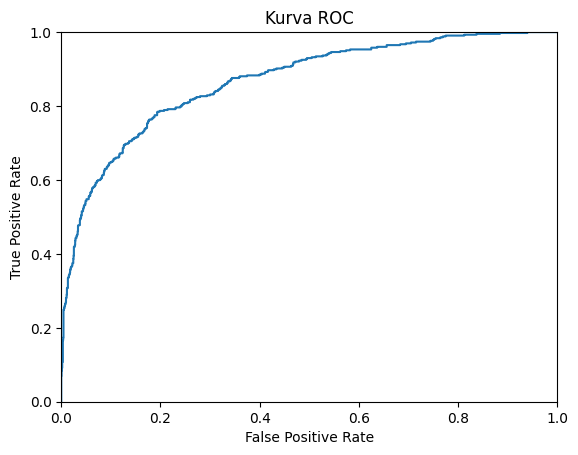


----------------Testing----------------
Confusion Matrix
[[1518   55]
 [ 223  204]]
Accuracy         : 86.1 %
ROC AUC          : 72.1 %
Precision Class 0: 87.2 %
Precision Class 1: 78.8 %
Recall Class 0   : 96.5 %
Recall Class 1   : 47.8 %
F1 Score Class 0 : 91.6 %
F1 Score Class 1 : 59.5 %

----------------Kurva ROC Testing----------------


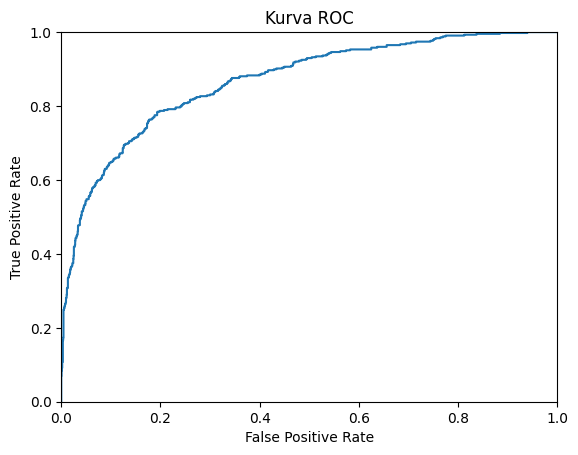

In [65]:
# Evaluasi model lr
class_eval(model=model_xg, features_train=features_train, features_test=features_test, target_train=target_train, target_test=target_test)

**Conclusion**

The XGBoost model outperforms the Logistic Regression model in predicting customer churn for Bank Beta. It demonstrates higher accuracy, precision, recall, and F1 scores, indicating improved performance in identifying churned customers.

Despite its better performance, there are still opportunities for refinement and optimization. Further feature engineering, hyperparameter tuning, and exploring more advanced techniques could potentially enhance the model's predictive power and robustness.

Overall, the XGBoost model serves as a promising approach for predicting customer churn for Bank Beta. With continued refinement and optimization, it has the potential to provide valuable insights and aid in the development of effective churn prevention strategies.

# Conclusion

In this project, we embarked on a journey to predict customer churn for Bank Beta using various machine learning models and evaluating their performance. Let's summarize the key insights and conclusions drawn from the evaluation of Decision Tree, Random Forest, Logistic Regression, and XGBoost models, along with the overarching implications and next steps:

**Decision Tree Model:**
  * The Decision Tree model demonstrates strong performance on the training data, with high accuracy (90.4%) and ROC AUC score (79.9%).
  * However, the model exhibits signs of overfitting, as evidenced by the drop in accuracy (84.0%) and other metrics on the testing data.
  * To improve generalization, techniques like pruning the decision tree and exploring ensemble methods could be considered.

**Random Forest Model:**
  * The Random Forest model achieves outstanding performance on the training data, with near-perfect accuracy (99.5%) and ROC AUC score (98.9%).
  * Despite this, the model shows signs of overfitting on the testing data, with lower accuracy (84.2%) and degraded performance metrics.
  * Further exploration of hyperparameter tuning, feature engineering, and ensemble techniques could enhance the model's generalizability.

**Logistic Regression Model:**
  * The Logistic Regression model demonstrates limited effectiveness in predicting customer churn, with accuracy around 79.3% on the training data and 78.3% on the testing data.
  * The model struggles to accurately identify churned customers, as indicated by low recall and F1 scores for Class 1.
  * Addressing class imbalance and exploring alternative modeling approaches could potentially improve the model's performance.

**XGBoost Model:**
  * The XGBoost model outperforms the Logistic Regression model, achieving higher accuracy (88.7% on training, 86.1% on testing) and improved precision, recall, and F1 scores for churned customers.
  * Despite its better performance, there is still room for enhancement through further feature engineering and hyperparameter tuning.

**General Conclusion and Next Steps:**
  * Overall, while each model shows strengths and weaknesses, the XGBoost model emerges as the most promising approach for predicting customer churn.
  * To further enhance the XGBoost model's performance and generalizability, we plan to:
    * Conduct in-depth feature engineering to capture more relevant information.
    * Explore hyperparameter tuning to optimize model parameters.
    * Address class imbalance through techniques like oversampling or undersampling.
    * Investigate ensemble methods and advanced modeling techniques to improve predictive power.
  * Additionally, ongoing monitoring and refinement of the model will be crucial to ensure its accuracy and relevance over time.

By continuously iterating and refining our predictive model, we aim to provide Bank Beta with a reliable tool to identify potential churners early and implement proactive strategies to retain valuable customers. This proactive approach not only helps in reducing customer churn but also contributes to enhancing overall customer satisfaction and loyalty, ultimately driving business growth and success.